### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Visualizing the images

In [7]:
np.random.randint(0, 59999)

21750

7


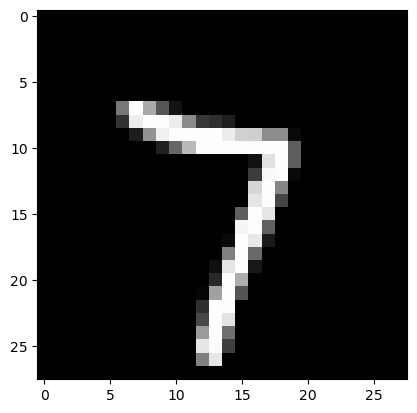

In [8]:
i = np.random.randint(0, 59999)
print(y_train[i])
plt.imshow(X_train[i], cmap="gray")

In [9]:
np.arange(0,100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

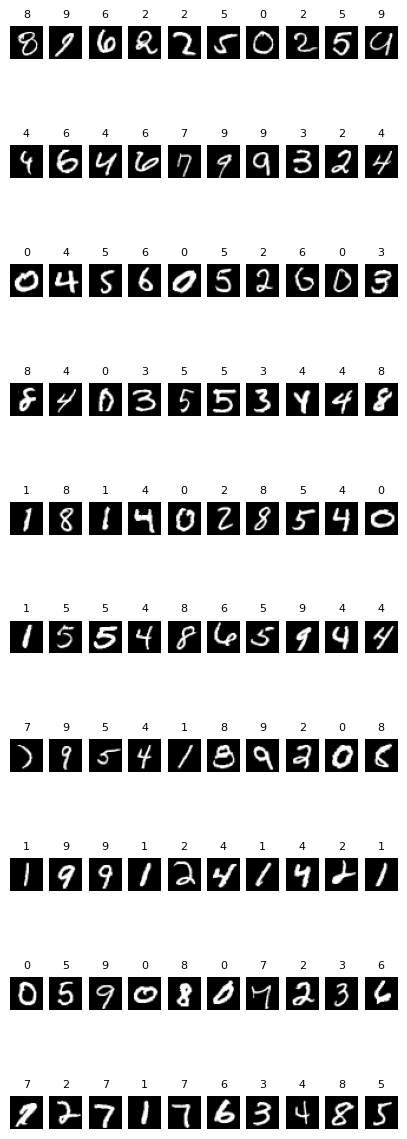

In [10]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(5,15))
axes = axes.ravel()

for i in np.arange(0, width * height):
    index = np.random.randint(0, 59999)
    axes[i].imshow(X_train[index], cmap='gray')
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [11]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [14]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train.shape

(60000, 784)

In [17]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test.shape

(10000, 784)

### Building and training the autoencoder

In [18]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

In [19]:
autoencoder = Sequential()

# Encoding
autoencoder.add(Dense(units=128, activation="relu", input_dim=784))
autoencoder.add(Dense(units=64, activation="relu"))
autoencoder.add(Dense(units=32, activation="relu"))

# Decoding
autoencoder.add(Dense(units=64, activation="relu"))
autoencoder.add(Dense(units=128, activation="relu"))
autoencoder.add(Dense(units=784, activation="sigmoid"))

In [20]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [21]:
autoencoder.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 16s 6ms/step - loss: 0.1516 - accuracy: 0.0103
Epoch 2/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1085 - accuracy: 0.0128
Epoch 3/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1003 - accuracy: 0.0122
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0961 - accuracy: 0.0127
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0934 - accuracy: 0.0127
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0915 - accuracy: 0.0131
Epoch 7/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0901 - accuracy: 0.0132
Epoch 8/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0890 - accuracy: 0.0135
Epoch 9/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0880 - accuracy: 0.0138
Epoch 10/50
1875/1875 [==============================] - 13s 7ms/step - l

### Encoding the images

In [24]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [25]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [26]:
autoencoder.get_layer('dense_2').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [27]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [28]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [29]:
X_test[0].shape

(784,)

In [30]:
X_test[0].reshape(1, -1).shape

(1, 784)

In [31]:
encoded_image = encoder.predict(X_test[0].reshape(1, -1))

1/1 [==============================] - 0s 223ms/step


In [32]:
encoded_image, encoded_image.shape

(array([[0.        , 6.100731  , 7.948993  , 0.        , 0.        ,
         3.8091242 , 0.        , 3.2401104 , 0.6808953 , 2.4151814 ,
         5.0458503 , 3.9971936 , 4.296451  , 3.156838  , 2.9879901 ,
         0.96200335, 2.2259262 , 0.        , 2.9281583 , 2.6871917 ,
         2.5876858 , 3.3441627 , 0.        , 3.8491626 , 4.500858  ,
         5.9062862 , 3.185287  , 2.7119515 , 2.4113188 , 2.495836  ,
         2.3908453 , 9.483714  ]], dtype=float32),
 (1, 32))

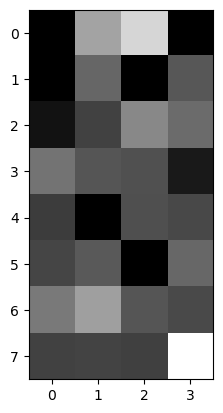

In [33]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray')

### Decoding the images

In [34]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [35]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [36]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 145ms/step


In [37]:
decoded_image.shape

(1, 784)

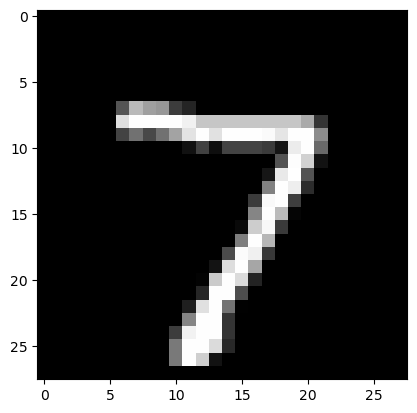

In [38]:
plt.imshow(X_test[0].reshape(28,28), cmap="gray");

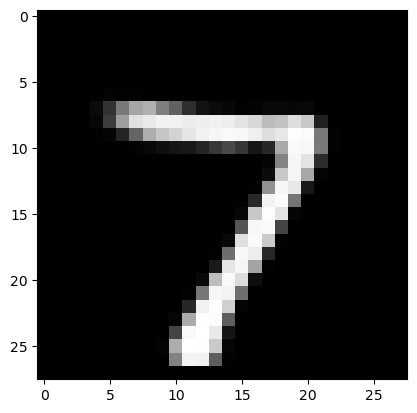

In [39]:
plt.imshow(decoded_image.reshape(28,28), cmap="gray");

### Encoding and decoding the test images

In [40]:
X_test.shape[0]

10000

1/1 [==============================] - 0s 43ms/step


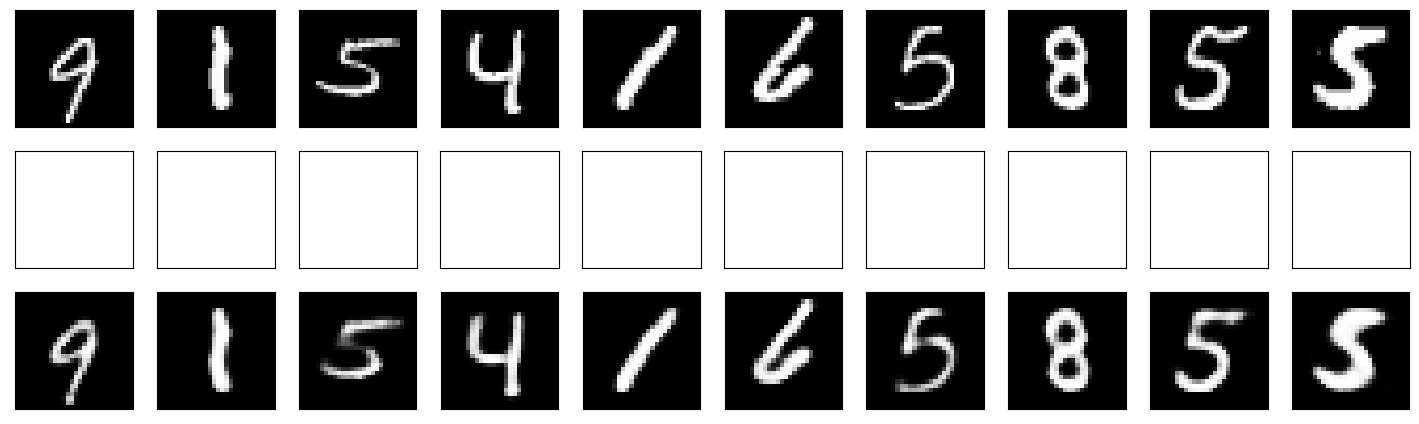

In [41]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
    
    # Original image
    ax = plt.subplot(10, 10, i+1)
    plt.imshow(X_test[image_index].reshape(28,28), cmap="gray")
    plt.xticks(())
    plt.yticks(())
    
    # Coded images
    ax = plt.subplot(10, 10, i + 1 + n_images)
    encoded_image = encoder.predict(X_test[image_index].reshape(1, -1))
    plt.xticks(())
    plt.yticks(())
    
    # Decoded Images
    ax = plt.subplot(10, 10, i + 1 + n_images * 2)
    plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap="gray")
    plt.xticks(())
    plt.yticks(())